<a href="https://colab.research.google.com/github/the-sulav/just_a_sec/blob/main/Brest_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Overview:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score

In [ ]:
# Link To Dataset https://www.kaggle.com/datasets/imtkaggleteam/breast-cancer

In [ ]:
data = pd.read_csv("breast-cancer-wisconsin-data_data.csv")

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.shape

(569, 33)

In [ ]:
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
for feature in data.columns:
  missing_value = data[feature].isnull().sum()
  print(f'The number of missing values in {feature} is : {missing_value}')



The number of missing values in id is : 0
The number of missing values in diagnosis is : 0
The number of missing values in radius_mean is : 0
The number of missing values in texture_mean is : 0
The number of missing values in perimeter_mean is : 0
The number of missing values in area_mean is : 0
The number of missing values in smoothness_mean is : 0
The number of missing values in compactness_mean is : 0
The number of missing values in concavity_mean is : 0
The number of missing values in concave points_mean is : 0
The number of missing values in symmetry_mean is : 0
The number of missing values in fractal_dimension_mean is : 0
The number of missing values in radius_se is : 0
The number of missing values in texture_se is : 0
The number of missing values in perimeter_se is : 0
The number of missing values in area_se is : 0
The number of missing values in smoothness_se is : 0
The number of missing values in compactness_se is : 0
The number of missing values in concavity_se is : 0
The num

In [ ]:
data = data.drop("Unnamed: 32",axis = 1)

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df = data.copy()

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
if "diagnosis" in df.columns:
  Y = df.pop("diagnosis")
  print("disgnosis column splitted")
else: print("diagnosis column already splitted")


disgnosis column splitted


In [ ]:
X = df.copy()

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)
y_encoded = pd.DataFrame(y_encoded)
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'B': 0, 'M': 1}


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y_encoded, random_state = 23,test_size = 0.2)

In [ ]:
scale= StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(455, 31)
(455, 1)
(114, 31)
(114, 1)


# USING LogisticRegression with "liblinear" as solver

In [ ]:
model = LogisticRegression(solver ="liblinear")

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
print(f'accuracy: {accuracy_score(y_test,y_predict)}')
print(f'recall: {recall_score(y_test,y_predict)}')
print(f'f1_score: {f1_score(y_test,y_predict)}')
print(f'Precision_score: {precision_score(y_test,y_predict)}')


accuracy: 0.9824561403508771
recall: 0.9743589743589743
f1_score: 0.9743589743589743
Precision_score: 0.9743589743589743


In [ ]:
print(f'accuracy: {accuracy_score(y_test,y_predict)}')
print(f'recall: {recall_score(y_test,y_predict)}')
print(f'f1_score: {f1_score(y_test,y_predict)}')
print(f'Precision_score: {precision_score(y_test,y_predict)}')


accuracy: 0.34210526315789475
recall: 1.0
f1_score: 0.5098039215686275
Precision_score: 0.34210526315789475


#USING SGDClassifier

In [ ]:
model = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)

In [ ]:
print(f'accuracy: {accuracy_score(y_test,y_predict)}')
print(f'recall: {recall_score(y_test,y_predict)}')
print(f'f1_score: {f1_score(y_test,y_predict)}')
print(f'Precision_score: {precision_score(y_test,y_predict)}')


accuracy: 0.9736842105263158
recall: 0.9487179487179487
f1_score: 0.9610389610389611
Precision_score: 0.9736842105263158


In [ ]:
print(f'accuracy: {accuracy_score(y_test,y_predict)}')
print(f'recall: {recall_score(y_test,y_predict)}')
print(f'f1_score: {f1_score(y_test,y_predict)}')
print(f'Precision_score: {precision_score(y_test,y_predict)}')


accuracy: 0.9736842105263158
recall: 0.9487179487179487
f1_score: 0.9610389610389611
Precision_score: 0.9736842105263158


In [ ]:
print(f' Accuracy :{accuracy_score(y_test,y_predict)*100}%')

 Accuracy :97.36842105263158%


# TRYING NEURAL NETWORK

In [ ]:
from tensorflow.keras import models,layers

In [ ]:
input_dimention = x_train.shape[1]
print(input_dimention)

31


In [ ]:
model = models.Sequential([
    layers.Dense(128,activation ="relu",input_shape=(input_dimention,)),
    layers.Dense(64,activation ="relu"),
    layers.Dense(1,activation ="sigmoid")
])
model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [ ]:
history = model.fit(x_train,y_train,epochs =100 ,batch_size = 32)

Epoch 1/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0140 - accuracy: 0.9978
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0128 - accuracy: 0.9978
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0115 - accuracy: 0.9978
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0111 - accuracy: 0.9978
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0097 - accuracy: 0.9978
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0090 - accuracy: 1.0000
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0091 - accuracy: 0.9956
Epoch 8/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 9/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 10/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 11/

In [ ]:
test_loss,test_accuracy = model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.1731 - accuracy: 0.9825


In [ ]:
print(f'accuracy: {accuracy_score(y_test,y_predict)}')
print(f'recall: {recall_score(y_test,y_predict)}')
print(f'f1_score: {f1_score(y_test,y_predict)}')
print(f'Precision_score: {precision_score(y_test,y_predict)}')

accuracy: 0.9736842105263158
recall: 0.9487179487179487
f1_score: 0.9610389610389611
Precision_score: 0.9736842105263158


In [ ]:
print(f'Accuracy is: {test_accuracy*100}%')

Accuracy is: 98.24561476707458%


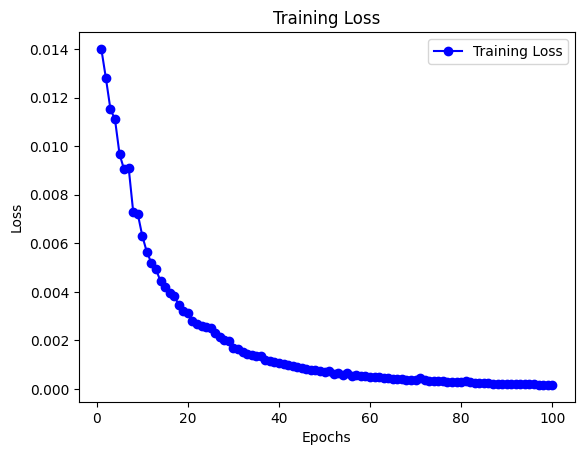

In [ ]:
train_loss = history.history['loss']

# Plot the training loss values
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label='Training Loss', linestyle='-', marker='o', color='b')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()